In [ ]:
## Introduction

In [ ]:
## Importing Required Libraries

In [10]:
import time

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set_style('whitegrid')

import os

import sys

# regular expressions for removing special characters, such as punctuation

import re

import string

# gensim is a library for text processing including n-gram models

import gensim

from gensim.utils import simple_preprocess

from gensim.parsing.preprocessing import STOPWORDS

from gensim.models.phrases import Phraser, Phrases, ENGLISH_CONNECTOR_WORDS

# spacy is also for text processing, here we are using the lemmatiser

import spacy

from wordcloud import WordCloud

from termcolor import colored

#Set display option to show full length of string content in cells and all columns

pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_columns', None)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix



from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline



from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf

import keras

from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, GRU

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.losses import binary_crossentropy

from tensorflow.keras.optimizers import Adam

from keras.initializers import Constant

In [ ]:
#Importing Dataset

In [9]:
# Import and create training set

df_train = pd.read_csv("/content/train.csv")

# Import and create test set

df_test = pd.read_csv("/content/test.csv")

# Display df_train

df_train

Class Index  \
0                 3   
1                 3   
2                 3   
3                 3   
4                 3   
...             ...   
119995            1   
119996            2   
119997            2   
119998            2   
119999            2   

                                                                            Title  \
0                               Wall St. Bears Claw Back Into the Black (Reuters)   
1                             Carlyle Looks Toward Commercial Aerospace (Reuters)   
2                                 Oil and Economy Cloud Stocks' Outlook (Reuters)   
3                    Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)   
4       Oil prices soar to all-time record, posing new menace to US economy (AFP)   
...                                                                           ...   
119995                         Pakistan's Musharraf Says Won't Quit as Army Chief   
119996                                          Renteria signing a top-shelf deal   
119997                                            Saban not going to Dolphins yet   
119998                                                          Today's NFL games   
119999                                               Nets get Carter from Raptors   

                                                                                                                                                                                                                                                                                                                                                             Description  
0                                                                                                                                                                                                                                                                         Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.  
1                                                                                                                                                 Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.  
2                                                                                                                                                                               Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.  
3                                                                                                                                                                    Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.  
4                                                                                                                                                                                                       AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.  
...                                                                                                                                                                                                                                                                                                                                                                  ...  
119995                                                                                                                                                                   

In [12]:
print(f'Train Dataset: {df_train.shape}')

print(f'\nTest Dataset: {df_test.shape}')

Train Dataset: (120000, 3)

Test Dataset: (7600, 3)


In [13]:
# Create a copy of the 'df_train' DataFrame and store 'news_df'

news_df = df_train.copy()



# Combine the 'Title' and 'Description' columns into a new 'news' column

news_df['news'] = df_train['Title'] + " " + df_train['Description']



# Drop the 'Title' and 'Description' columns from 'news_df'

news_df.drop(columns=['Title', 'Description'], inplace=True)



# Display the resulting DataFrame

news_df

Class Index  \
0                 3   
1                 3   
2                 3   
3                 3   
4                 3   
...             ...   
119995            1   
119996            2   
119997            2   
119998            2   
119999            2   

                                                                                                                                                                                                                                                                                                                                                                                      news  
0                                                                                                                                                                                                                                         Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.  
1                                                                                                               Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.  
2                                                                                                                                                 Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.  
3                                                                                                                         Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.  
4                                                                                                                                               Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.  
...                                                                                                                                                                                                                                                                                                                                                                                    ...  
119995                                                                                                                                                       Pakistan's Musharraf Says Won't Quit as Army Chief  KARACHI (Reuters) - Pakistani President Pervez Musharraf  has said he will stay on as army chief, reneging on a pledge to  quit the powerful post by the end of the year.  
119996                                                                Renteria signing a top-shelf deal Red Sox general manager Theo Epstein acknowledged Edgar Renteria was more a luxury for the 2005 Red Sox than a necessity. But there's nothing wrong with getting the keys to a BMW, and that's what the four-time All-Star and two-time Gold Glover is in the eyes of the Red Sox.  
119997                                                                                                                             Saban not going to Dolphins yet The Miami Dolphins will put their courtship of LSU coach Nick Saban on hold to comply with the NFL's hiring policy by interviewing at least

In [14]:
# Display summary information of news_df

news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   news         120000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [15]:
# Count the occurrences of each unique value in the 'Class Index' column

news_df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

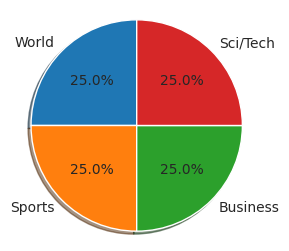

In [16]:
# Get unique class indices

labels = news_df['Class Index'].unique()



# Define real labels

real_labels = ['World', 'Sports', 'Business', 'Sci/Tech']



# list to store sizes of each class

sizes = []



# Iterate over each unique class index

for i in labels:

    # Calculate the size of each class

    size = len(news_df[news_df['Class Index'] == i])

    sizes.append(size)



# Create a pie chart to visualize the distribution of classes

fig = plt.figure(figsize=(3, 3))

plt.pie(sizes, labels=real_labels, autopct='%1.1f%%',

        shadow=True, startangle=90)

plt.axis('equal')

# Display the chart

plt.show()

In [17]:
# Assign training data

x_train = news_df['news']

y_train = news_df['Class Index']



# Assign testing data

x_test = df_test['Description']

y_test = df_test['Class Index']

In [18]:
## Preprocessing the Data (used for ML classifiers)

In [19]:
def process_description(description):

    '''

    Input:

        description: a string containing a description

    Output:

        description_clean: a list of words containing the processed disc



    '''

    # Remove HTML Tag

    pattern = re.compile(r'<.*?>')

    description = description.map(lambda x: re.sub(pattern, '', x))



    # Removal of URL

    pattern = re.compile(r'https?://\S+|www\.\S+')

    description = description.map(lambda x: re.sub(pattern, '', x).strip())



    # Convert the to lowercase

    description = description.map(lambda x: x.lower())



    ## tokenize description

    def sent_to_words(sentences):

        for sentence in sentences:

            yield(simple_preprocess(str(sentence), deacc=False))



    data = description.tolist()

    disc_tokens = list(sent_to_words(data))



    ## Remove punctuation

    disc_tokens = [[token for token in sentence if token not in string.punctuation] for sentence in disc_tokens]



    ## Remove numbers

    disc_tokens = [[token for token in sentence if token not in string.digits] for sentence in disc_tokens]



    ## lemmatization: keeping only noun, adj, vb, adv

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

        """https://spacy.io/api/annotation"""

        # Initialize spacy 'en' model, keeping only tagger component (for efficiency)

        nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

        texts_out = []

        for sent in texts:

            doc = nlp(" ".join(sent))

            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

        return texts_out



    description_lem = lemmatization(disc_tokens)



    ## remove_stopwords

    my_stop_words = STOPWORDS.union(set(['company', 'year', 'yesterday', 'week', 'new', 'reuter']))

    description_clean = [[token for token in sentence if token not in my_stop_words] for sentence in description_lem]



    ## Build the bigram model

    bigram = Phrases(description_clean, min_count=5, threshold=100) # higher threshold fewer phrases.

    ## Get phrases (bigrams)

    bigram_mod = Phraser(bigram)



    description_clean = [bigram_mod[sentence] for sentence in description_clean]



    return description_clean

In [20]:
# Process the news in the training and testing data

x_train_clean = process_description(x_train)

x_test_clean = process_description(x_test)



# Combine the processed descriptions from both training and testing data

x_clean = x_train_clean + x_test_clean



# Concatenate the labels from both training and testing data

Y = pd.concat([y_train, y_test]).reset_index(drop=True)



# Print a sample original description and its processed version

print('\033[92m' + 'A sample original description\n', x_train[0])

print('\033[94m'+'\nProcessed description\n', x_train_clean[0])

A sample original description
 Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Processed description
 ['bear', 'claw', 'black', 'short', 'seller', 'dwindle', 'band', 'ultra', 'cynic', 'green']


In [ ]:
##EDA: Frequency and Visualisation
#Finding specific words associated with each four news topics
#Define a function to generate word cloud base on a list of words

In [21]:
def getWordCloud(words):

    """

    Generate and display a word cloud from a list of hashtags.

    Args:

    - words (list): A list of words.

    """

    # Combine all words into a single text string.

    text = ' '.join(words)

    # Generate a word cloud image.

    wordcloud = WordCloud().generate(text)

    # Display the generated image using matplotlib.

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

    # Create a new word cloud with adjusted font size.

    wordcloud = WordCloud(max_font_size=40).generate(text)

    # Create a new figure and display the adjusted word cloud.

    plt.figure()

    plt.imshow(wordcloud, interpolation="bilinear")

    plt.axis("off")

    # Show the word cloud

    plt.show()

In [22]:
#Word Cloud for all topic news

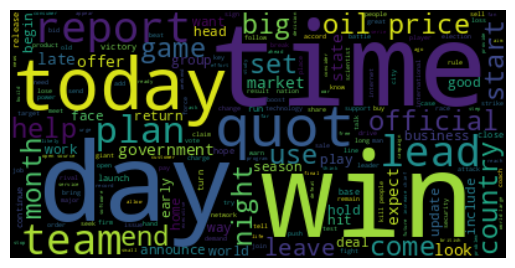

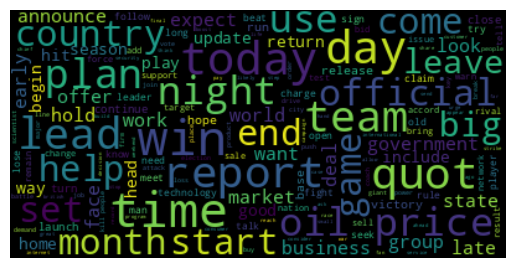

In [23]:
word_list = []

for senc in x_clean:

    # Combine words in each sentence into a single string.

    merged = ' '.join(senc)

    word_list.append(merged)

# Generate and display a word cloud

getWordCloud(word_list)

In [24]:
# Separate the items based on the labels

world_news = []

sports_news = []

business_news = []

Tech_sci_news = []

# Iterate through cleaned data and labels.

for data, label in zip(x_clean, Y):

    # Categorize data based on label.

    if label == 1:

        world_news.append(data)

    elif label == 2:

        sports_news.append(data)

    elif label == 3:

        business_news.append(data)

    else:

        Tech_sci_news.append(data)

In [ ]:
#World News Word_Cloud

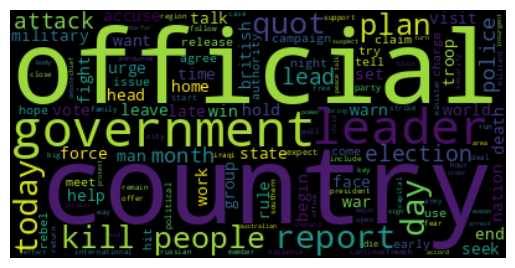

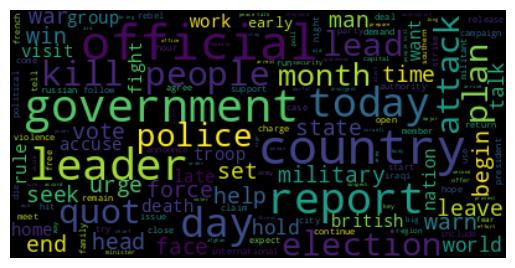

In [26]:
word_list = []

for senc in world_news:

    # Combine words in each sentence into a single string.

    merged = ' '.join(senc)

    word_list.append(merged)

# Generate and display a word cloud

getWordCloud(word_list)

In [ ]:

#Sports News Word_Cloud

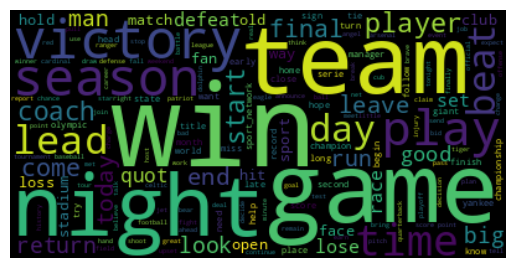

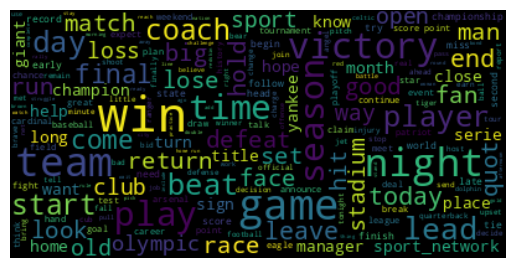

In [27]:
word_list = []

for senc in sports_news:

    # Combine words in each sentence into a single string.

    merged = ' '.join(senc)

    word_list.append(merged)

# Generate and display a word cloud

getWordCloud(word_list)

In [ ]:
#Business News Word_Cloud

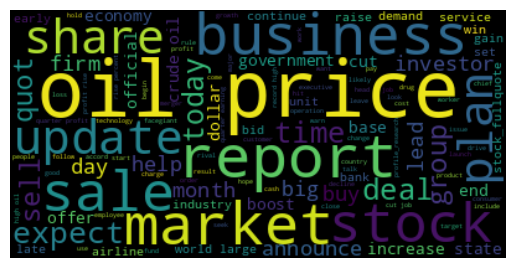

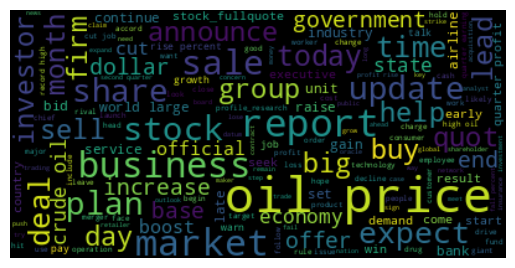

In [28]:
word_list = []

for senc in business_news:

    # Combine words in each sentence into a single string.

    merged = ' '.join(senc)

    word_list.append(merged)

# Generate and display a word cloud

getWordCloud(word_list)

In [ ]:
#Scientific-Technology News Word_Cloud

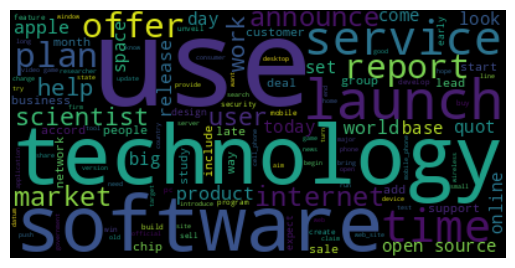

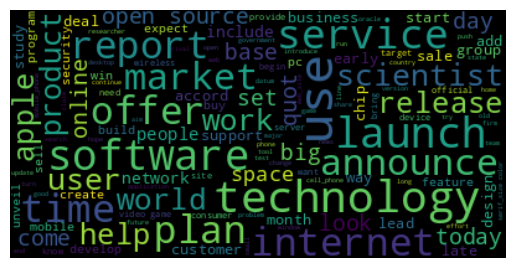

In [29]:
word_list = []

for senc in Tech_sci_news:

    # Combine words in each sentence into a single string.

    merged = ' '.join(senc)

    word_list.append(merged)

# Generate and display a word cloud

getWordCloud(word_list)

In [ ]:
#Word Frequencies

In [30]:
def build_freqs(news, topic):

    """Build frequencies.

    Input:

        news: a list of news

        topic: an m x 1 array with an int topic of each news



    Output:

        freqs: a dictionary mapping each (word, topic) pair to its

        frequency

    """

    # Convert topic array to list

    topic_list = np.squeeze(topic).tolist()



    freqs = {}

    # Iterate through news and topics

    for disc, y in zip(news, topic_list):

        # Iterate through words in each disc

        for word in disc:

            pair = (word, y)

            # Increment frequency for (word, topic) pair

            freqs[pair] = freqs.get(pair, 0) + 1



    return freqs

In [31]:
# create frequency dictionary

freqs = build_freqs(x_clean, Y)



# check data type

print(f'type(freqs) = {type(freqs)}')



# check length of the dictionary

print(f'len(freqs) = {len(freqs)}\n')

print(freqs)

type(freqs) = <class 'dict'>
len(freqs) = 77219

{('bear', 3): 67, ('claw', 3): 22, ('black', 3): 201, ('short', 3): 294, ('seller', 3): 42, ('dwindle', 3): 19, ('band', 3): 31, ('ultra', 3): 16, ('cynic', 3): 2, ('green', 3): 35, ('look', 3): 665, ('commercial', 3): 179, ('aerospace', 3): 75, ('private', 3): 266, ('investment', 3): 629, ('firm', 3): 1361, ('carlyle', 3): 2, ('group', 3): 1478, ('reputation', 3): 24, ('time', 3): 1477, ('occasionally', 3): 2, ('controversial', 3): 83, ('play', 3): 144, ('defense', 3): 151, ('industry', 3): 1137, ('quietly', 3): 22, ('place', 3): 201, ('bet', 3): 125, ('market', 3): 2706, ('oil', 3): 6376, ('economy', 3): 1440, ('cloud', 3): 38, ('stock', 3): 4487, ('outlook', 3): 639, ('soar', 3): 466, ('crude', 3): 1217, ('price', 3): 5563, ('worry', 3): 549, ('earning', 3): 1853, ('expect', 3): 1885, ('hang', 3): 50, ('depth', 3): 18, ('summer', 3): 173, ('doldrum', 3): 9, ('halt', 3): 180, ('export', 3): 425, ('main', 3): 187, ('southern', 3): 56, (

In [32]:
words = list(set([item for sublist in x_clean for item in sublist]))

word_list = []



# Iterate through unique words

for word in words:

    # Get frequencies for each label

    freq_label_1 = freqs.get((word, 1), 0)

    freq_label_2 = freqs.get((word, 2), 0)

    freq_label_3 = freqs.get((word, 3), 0)

    freq_label_4 = freqs.get((word, 4), 0)



data = []

# Loop through selected words

for word in words:

    # Initialize counts for each class

    count_1 = 0

    count_2 = 0

    count_3 = 0

    count_4 = 0



    # Retrieve counts for each class

    if (word, 1) in freqs:

        count_1 = freqs[(word, 1)]



    if (word, 2) in freqs:

        count_2 = freqs[(word, 2)]



    if (word, 3) in freqs:

        count_3 = freqs[(word, 3)]



    if (word, 4) in freqs:

        count_4 = freqs[(word, 4)]



    # Append the word counts to the table

    data.append([word, count_1, count_2, count_3, count_4])



data

[['feelin', 0, 0, 1, 0],
 ['shred_roof', 8, 0, 0, 0],
 ['cash_carrion', 0, 0, 0, 16],
 ['upstream', 2, 0, 1, 0],
 ['mathia', 1, 0, 0, 0],
 ['pastoral', 1, 0, 0, 0],
 ['soupgate', 0, 1, 0, 0],
 ['osrm', 0, 0, 0, 2],
 ['pid', 1, 0, 0, 0],
 ['impromptu', 2, 1, 0, 1],
 ['plasma_display', 0, 0, 4, 7],
 ['mambo', 0, 0, 0, 6],
 ['malicious_code', 0, 0, 0, 49],
 ['aspirational', 1, 0, 0, 0],
 ['theologian', 0, 0, 0, 1],
 ['sayli', 1, 0, 0, 0],
 ['nailing', 1, 1, 0, 0],
 ['roulette', 1, 4, 0, 0],
 ['fruition', 0, 2, 1, 4],
 ['battler', 3, 1, 0, 0],
 ['feyenoord', 0, 23, 0, 0],
 ['nreece', 1, 0, 0, 0],
 ['cmcsa', 0, 0, 14, 2],
 ['accenturewill', 0, 0, 1, 0],
 ['swinton', 0, 1, 0, 0],
 ['vole', 0, 0, 0, 4],
 ['vizcaino', 0, 14, 0, 0],
 ['scold', 5, 6, 0, 1],
 ['cast_doubt', 19, 7, 16, 11],
 ['defination', 0, 0, 0, 1],
 ['wag', 2, 2, 3, 0],
 ['diller', 0, 0, 1, 0],
 ['yona', 1, 0, 0, 0],
 ['estuary', 0, 0, 0, 2],
 ['predicament', 0, 3, 1, 0],
 ['baseliner', 0, 1, 0, 0],
 ['hispanic', 21, 1, 22, 1]

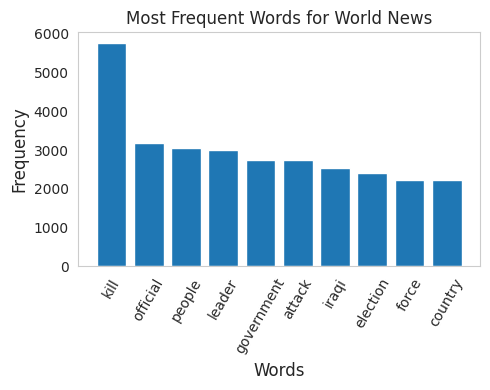

In [33]:
# Create a dictionary of world words with their frequencies

world_words = {word[0]: word[1] for word in data if word[1] == max(word[1:5])}



# Sort the world words by frequency

sorted_words = sorted(world_words.items(), key=lambda x: x[1], reverse=True)



# Select the top 10 most frequent words

top_10_words = sorted_words[:10]



# Extract words and frequencies

words = [word[0] for word in top_10_words]

frequencies = [word[1] for word in top_10_words]



# Plot the bar chart

plt.figure(figsize=(5, 4))

plt.bar(words, frequencies)

plt.xlabel('Words', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.title('Most Frequent Words for World News', fontsize=12)

plt.xticks(rotation=60, fontsize=10)

plt.grid(False)

plt.tight_layout()

plt.show()

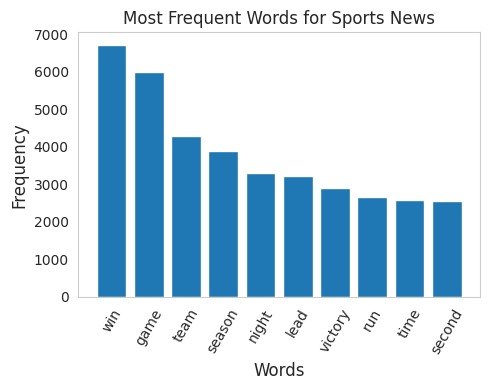

In [34]:
# Create a dictionary of sports words with their frequencies

sports_words = {word[0]: word[2] for word in data if word[2] == max(word[1:5])}



# Sort the sports words by frequency

sorted_words = sorted(sports_words.items(), key=lambda x: x[1], reverse=True)



# Select the top 10 most frequent words

top_10_words = sorted_words[:10]



# Extract words and frequencies

words = [word[0] for word in top_10_words]

frequencies = [word[1] for word in top_10_words]



# Plot the bar chart

plt.figure(figsize=(5, 4))

plt.bar(words, frequencies)

plt.xlabel('Words', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.title('Most Frequent Words for Sports News', fontsize=12)

plt.xticks(rotation=60, fontsize=10)

plt.grid(False)

plt.tight_layout()

plt.show()

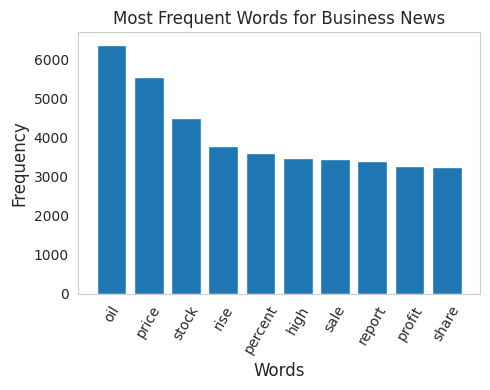

In [35]:
# Create a dictionary of business words with their frequencies

business_words = {word[0]: word[3] for word in data if word[3] == max(word[1:5])}



# Sort the business words by frequency

sorted_words = sorted(business_words.items(), key=lambda x: x[1], reverse=True)



# Select the top 10 most frequent words

top_10_words = sorted_words[:10]



# Extract words and frequencies

words = [word[0] for word in top_10_words]

frequencies = [word[1] for word in top_10_words]



# Plot the bar chart

plt.figure(figsize=(5, 4))

plt.bar(words, frequencies)

plt.xlabel('Words', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.title('Most Frequent Words for Business News', fontsize=12)

plt.xticks(rotation=60, fontsize=10)

plt.grid(False)

plt.tight_layout()

plt.show()

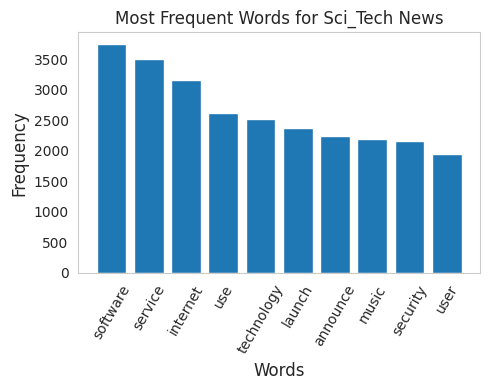

In [36]:
# Create a dictionary of sci_tech words with their frequencies

sci_tech_words = {word[0]: word[4] for word in data if word[4] == max(word[1:5])}



# Sort the sci_tech words by frequency

sorted_words = sorted(sci_tech_words.items(), key=lambda x: x[1], reverse=True)



# Select the top 10 most frequent words

top_10_words = sorted_words[:10]



# Extract words and frequencies

words = [word[0] for word in top_10_words]

frequencies = [word[1] for word in top_10_words]



# Plot the bar chart

plt.figure(figsize=(5, 4))

plt.bar(words, frequencies)

plt.xlabel('Words', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.title('Most Frequent Words for Sci_Tech News', fontsize=12)

plt.xticks(rotation=60, fontsize=10)

plt.grid(False)

plt.tight_layout()

plt.show()

In [ ]:
#Model Development: News Articles Classification

In [ ]:
#Vectorizing text data in train and test datasets

In [37]:
# Join tokens in each document into a single string for training data

x_train_join = [' '.join(tokens) for tokens in x_train_clean]



# Initialize a TF-IDF vectorizer

tfidf_vectorizer = TfidfVectorizer()



# Fit the vectorizer on the training data and transform the training data

x_train_vec = tfidf_vectorizer.fit_transform(x_train_join)



# Transform the test data using the same vectorizer

x_test_join = [' '.join(tokens) for tokens in x_test_clean]

x_test_vec = tfidf_vectorizer.transform(x_test_join)



# Print the shapes of the transformed data

print(f'x_train_vec: {x_train_vec.shape}')

print(f'x_test_vec: {x_test_vec.shape}')

x_train_vec: (120000, 40359)
x_test_vec: (7600, 40359)


In [38]:
def report_confusion_matrix(y_test, y_pred):

    """

    Plot a confusion matrix heatmap



    Parameters:

        y_test (array-like): Real labels.

        y_pred (array-like): Predicted labels.



    Returns:

        None

    """

    # Define class names

    class_names = ['World', 'Sports', 'Business', 'Sci/Tech']



    # Print classification report

    print(classification_report(y_test, y_pred, target_names=class_names))



    # Calculate confusion matrix

    conf_matrix = confusion_matrix(y_test, y_pred)



    # Plot heatmap

    plt.figure(figsize=(5, 4))

    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')

    plt.ylabel('Real Labels')

    plt.title('Confusion Matrix')

    plt.show()

Accuracy: 86.99 %

Total Runtime: 2.83 s (0.05 min)

              precision    recall  f1-score   support

       World       0.88      0.87      0.87      1900
      Sports       0.94      0.95      0.94      1900
    Business       0.82      0.82      0.82      1900
    Sci/Tech       0.84      0.84      0.84      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



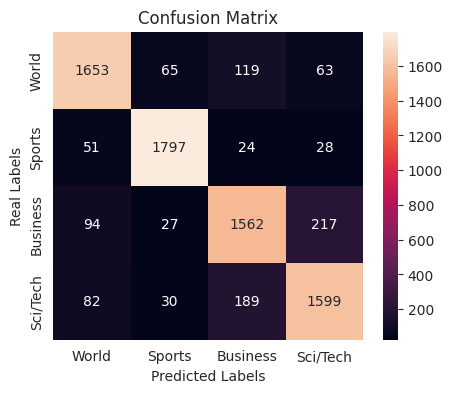

In [39]:
# Building a pipeline

munb = Pipeline([

    ('tfidf', TfidfVectorizer()),

    ('clf', MultinomialNB())

])



# Record the starting time for measuring the total runtime

start = time.time()



# Fit the pipeline on the training data

munb.fit(x_train_join, y_train)



# Predict labels for the test data

munb_predict = munb.predict(x_test_join)



# Print accuracy

print(f'Accuracy: {accuracy_score(y_test, munb_predict) * 100:.2f} %\n')



# Calculate the total runtime and print the result

tot_time = time.time() - start

print(f"Total Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)\n")



# display confusion matrix

report_confusion_matrix(y_test, munb_predict)

In [40]:
# Define the parameters for grid search

parameters = {'clf__alpha': (1, 1e-2, 1e-3)}



# Initialize GridSearchCV

gs_clf = GridSearchCV(munb, parameters, cv=5, n_jobs=-1)



# Perform grid search

gs_clf = gs_clf.fit(x_train_join, y_train)



# Print the best hyperparameters and the best score

print("Best Hyperparameters:", gs_clf.best_params_)

print("Best Score: ", gs_clf.best_score_)

Best Hyperparameters: {'clf__alpha': 1}
Best Score:  0.874775


MultinomialNB Best Accuracy: 86.99 %

              precision    recall  f1-score   support

       World       0.88      0.87      0.87      1900
      Sports       0.94      0.95      0.94      1900
    Business       0.82      0.82      0.82      1900
    Sci/Tech       0.84      0.84      0.84      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



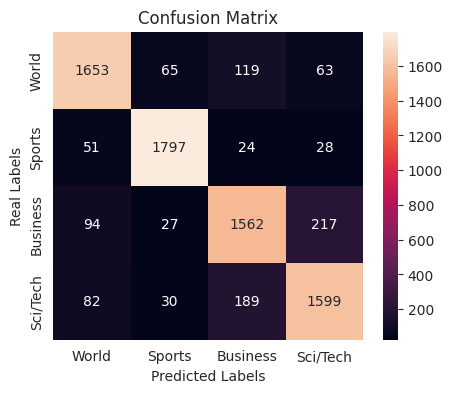

In [41]:
# Predict labels using the best estimator found by grid search

mulnb_predict = gs_clf.predict(x_test_join)



# Print the accuracy of the best MultinomialNB model

print(f'MultinomialNB Best Accuracy: {accuracy_score(y_test, mulnb_predict) * 100:.2f} %\n')



# Display confusion matrix

report_confusion_matrix(y_test, mulnb_predict)

# **HyperParameter Tuning**

In [42]:
# Define the parameters for grid search

parameters = {'clf__alpha': (1, 1e-2, 1e-3)}



# Initialize GridSearchCV

gs_clf = GridSearchCV(munb, parameters, cv=5, n_jobs=-1)



# Perform grid search

gs_clf = gs_clf.fit(x_train_join, y_train)



# Print the best hyperparameters and the best score

print("Best Hyperparameters:", gs_clf.best_params_)

print("Best Score: ", gs_clf.best_score_)

Best Hyperparameters: {'clf__alpha': 1}
Best Score:  0.874775


MultinomialNB Best Accuracy: 86.99 %

              precision    recall  f1-score   support

       World       0.88      0.87      0.87      1900
      Sports       0.94      0.95      0.94      1900
    Business       0.82      0.82      0.82      1900
    Sci/Tech       0.84      0.84      0.84      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



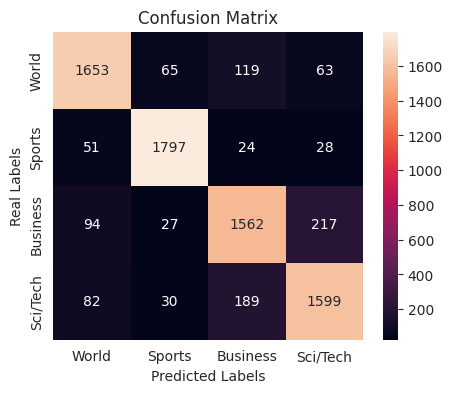

In [43]:
# Predict labels using the best estimator found by grid search

mulnb_predict = gs_clf.predict(x_test_join)



# Print the accuracy of the best MultinomialNB model

print(f'MultinomialNB Best Accuracy: {accuracy_score(y_test, mulnb_predict) * 100:.2f} %\n')



# Display confusion matrix

report_confusion_matrix(y_test, mulnb_predict)

# **Deep Learning models**

## **Preprocessing**

In [44]:
def process_sentence(description):

    '''

    Removes all special characters from sentence.

    It will also strip out extra whitespace and makes the string lowercase.



    Parameters:

        description (str): The input sentence or description to be processed.



    Returns:

        str: The processed text.

    '''

    # Remove HTML tags

    text = re.sub(r'<.*?>', '', description)

    # Remove URLs

    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove special characters, numbers, and conversion to lowercase

    text = re.sub(r'[\\\\/:*#&«`\'?¿";!<>(),.│0-9;=-]', '', text.lower().strip())

    return text

In [45]:
# Process the training data using the process_sentence function

x_train_proc = x_train.apply(process_sentence)



# Process the test data using the process_sentence function

x_test_proc = x_test.apply(process_sentence)

In [46]:
# Print a sample original description from the training data

print('\033[92m' + 'A sample original description:\n', x_train[0])



# Print the processed description of the same sample

print('\033[94m'+'\nProcessed description:\n', x_train_proc[0])

A sample original description:
 Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Processed description:
 wall st bears claw back into the black reuters reuters  shortsellers wall streets dwindlingband of ultracynics are seeing green again


In [47]:
# Concatenate the processed training and test data

X = pd.concat([x_train_proc, x_test_proc], ignore_index=True)



# Split all sentences into words

elements = (' '.join([sentence for sentence in X])).split()



# Append "<UNK>" to handle unknown words during inference

elements.append("<UNK>")



# Get the unique labels

labels = set(y_train)



# Print feature shapes and totals

print("Feature Shapes:")

print(f"\tTrain set: \t\t{x_train_proc.shape}",

      f"\n\tTest set: \t\t{x_test_proc.shape}")

print(f"Totals:\n\tWords in our Dataset: {len(elements)}\n\tLabels: {len(labels)}")

Feature Shapes:
	Train set: 		(120000,) 
	Test set: 		(7600,)
Totals:
	Words in our Dataset: 4642236
	Labels: 4


**Formatting the data**

In [48]:
def create_lookup_tables(text):

    """

    Create lookup tables for vocabulary



    Parameters:

    - text (list): The text split into words



    Returns:

    - tuple: A tuple of dictionaries (vocab_to_int, int_to_vocab)

    """

    # Get the unique vocabulary

    vocab = set(text)



    # Create a dictionary mapping words to integers

    vocab_to_int = {word: i for i, word in enumerate(vocab)}



    # Create a dictionary mapping integers to words

    int_to_vocab = {v: k for k, v in vocab_to_int.items()}



    return vocab_to_int, int_to_vocab

In [49]:
# Map the vocabulary to integers

vocab_to_int, int_to_vocab = create_lookup_tables(elements)



# Print the size of the vocabulary

print("Vocabulary of the dataset: {}".format(len(vocab_to_int)))

Vocabulary of the dataset: 93086


 Converting to integers

In [50]:
def convert_to_int(data, data_int):

    """

    Converts all our text to integers



    Parameters:

    - data (list): The text to be converted

    - data_int (dict): Dictionary mapping words to integers



    Returns:

    - list: All sentences in ints

    """

    all_items = []

    # Iterate through each sentence in the data

    for sentence in data:

        # Convert each word to its corresponding integer, or use "<UNK>" if word is unknown

        all_items.append([data_int[word] if word in data_int else data_int["<UNK>"] for word in sentence.split()])



    return all_items

In [51]:
# Convert the training and test data to integers using the vocabulary mapping

X_train_encoded = convert_to_int(x_train_proc, vocab_to_int)

X_test_encoded = convert_to_int(x_test_proc, vocab_to_int)

In [52]:
# Reshape the training and test labels

y_train_reshaped = np.array(y_train).reshape(-1, 1)

y_test_reshaped = np.array(y_test).reshape(-1, 1)



# One hot encode the outputs

enc = OneHotEncoder()

y_train_encoded = enc.fit_transform(y_train_reshaped).toarray()

y_test_encoded = enc.transform(y_test_reshaped).toarray()

In [53]:
y_train_encoded

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [54]:
max_sentence_length = max([len(txt) for txt in X])

# max_sentence_length = 500



# Truncate and pad input sentences

X_train_pad = sequence.pad_sequences (X_train_encoded, maxlen=max_sentence_length)

X_test_pad = sequence.pad_sequences (X_test_encoded, maxlen=max_sentence_length)

In [55]:
max_sentence_length

975

In [56]:
# This is a function to check DL clasifiers prediction on input samples



def news_classifier(news_text, start_indx=0, end_idx=1):

    """

    Converts the text and sends it to the model for classification

    """

    # Ensure news_text is converted into a Pandas Series

    if not isinstance(news_text, pd.Series):

        news_text = pd.Series([news_text])



    # News Labels

    labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']



    # Clean the sentences

    news_text = news_text.apply(process_sentence)



    # Transform and pad the sentences before using the model to predict

    news_text = convert_to_int(news_text, vocab_to_int)

    news_text = sequence.pad_sequences(news_text, maxlen=max_sentence_length)



    # Predict labels using the model

    test_preds = [labels[np.argmax(i)] for i in model.predict(news_text[start_indx:end_idx])]



    data = []



    for ind, label in zip(range(start_indx, end_idx), test_preds):

        news_article = news_text[ind]

        predicted_label = label



        if input_news is x_test:

            real_label = labels[y_test[ind]-1]  # Assuming y_test contains the real labels

        else:

            real_label = ' '



        data.append([news_article, predicted_label, real_label])



    # Construct DataFrame

    df = pd.DataFrame(data, columns=['News_Article', 'Predicted_Label', 'Real_Label'])

    return df

# **GRU Model**


**Base Model: 1 Layer (32), dropout = 0, batch_size = 32, embedding length = 100**

In [ ]:
max_features = len(vocab_to_int)

embedding_vector_length = 100



# Create the model

model = Sequential()

# Defininig layers

model.add(Embedding(max_features, embedding_vector_length, input_shape=(max_sentence_length,)))

model.add(GRU (32, return_sequences=False))

# Output layer

model.add(Dense(4, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print (model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 975, 100)            │       9,308,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 32)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,321,596 (35.56 MB)

 Trainable params: 9,321,596 (35.56 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Define early stopping criteria

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



# Record the starting time for measuring the total runtime

start = time.time()



# Train the model with early stopping

history = model.fit(X_train_pad, y_train_encoded,

                    batch_size = 32,

                    epochs=10,

                    validation_data=(X_test_pad, y_test_encoded),

                    callbacks=[early_stopping])



# Calculate the total runtime and print the result

tot_time = time.time() - start

print(f"\nTotal Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)")

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2159s 575ms/step - accuracy: 0.8044 - loss: 0.5082 - val_accuracy: 0.9041 - val_loss: 0.2827
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2186s 576ms/step - accuracy: 0.9470 - loss: 0.1626 - val_accuracy: 0.9030 - val_loss: 0.2832
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2169s 579ms/step - accuracy: 0.9672 - loss: 0.0967 - val_accuracy: 0.9020 - val_loss: 0.3166
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2204s 584ms/step - accuracy: 0.9815 - loss: 0.0542 - val_accuracy: 0.8954 - val_loss: 0.3781

Total Runtime: 8719.61 s (145.33 min)


Accuracy: 90.41%
238/238 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step
              precision    recall  f1-score   support

       World       0.92      0.89      0.91      1900
      Sports       0.95      0.97      0.96      1900
    Business       0.89      0.84      0.86      1900
    Sci/Tech       0.86      0.91      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



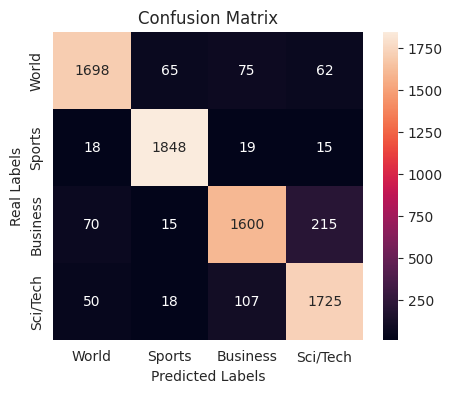

In [ ]:
# Final evaluation of the model

scores = model.evaluate(X_test_pad, y_test_encoded, verbose=0)

print(f"Accuracy: {scores[1]*100:.2f}%")



# Model Prediction

GRU_predict = model.predict(X_test_pad)

y_pred = [np.argmax(i)+1 for i in GRU_predict]



# Confusion Matrix

report_confusion_matrix(y_test, y_pred)

# **LSTM Model**

**Base Model: 1 Layer (32), dropout = 0, batch_size = 32, embedding length = 100**

In [ ]:
max_features = len(vocab_to_int)

embedding_vector_length = 100



# Create the model

model = Sequential()

model.add(Embedding(max_features, embedding_vector_length, input_shape=(max_sentence_length,)))

model.add(LSTM (32, return_sequences=False))

model.add(Dense(4, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print (model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 975, 100)            │       9,308,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,325,756 (35.57 MB)

 Trainable params: 9,325,756 (35.57 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Define early stopping criteria

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



# Record the starting time for measuring the total runtime

start = time.time()



# Train the model with early stopping

history = model.fit(X_train_pad, y_train_encoded,

                    batch_size = 32,

                    epochs=10,

                    validation_data=(X_test_pad, y_test_encoded),

                    callbacks=[early_stopping])



# Calculate the total runtime and print the result

tot_time = time.time() - start

print(f"\nTotal Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)")

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2100s 559ms/step - accuracy: 0.8257 - loss: 0.4642 - val_accuracy: 0.8967 - val_loss: 0.3097
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2056s 542ms/step - accuracy: 0.9468 - loss: 0.1695 - val_accuracy: 0.8970 - val_loss: 0.3035
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2080s 546ms/step - accuracy: 0.9641 - loss: 0.1078 - val_accuracy: 0.8967 - val_loss: 0.3285
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2045s 542ms/step - accuracy: 0.9763 - loss: 0.0671 - val_accuracy: 0.8922 - val_loss: 0.4030
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2062s 542ms/step - accuracy: 0.9864 - loss: 0.0393 - val_accuracy: 0.8870 - val_loss: 0.4002

Total Runtime: 10375.89 s (172.93 min)


Accuracy: 89.70%
238/238 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step
              precision    recall  f1-score   support

       World       0.93      0.89      0.91      1900
      Sports       0.96      0.96      0.96      1900
    Business       0.82      0.91      0.86      1900
    Sci/Tech       0.89      0.83      0.86      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



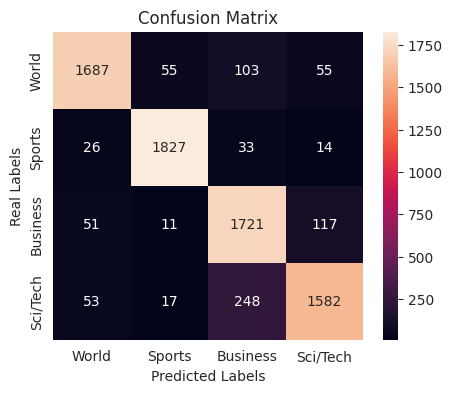

In [ ]:
# Final evaluation of the model

scores = model.evaluate(X_test_pad, y_test_encoded, verbose=0)

print(f"Accuracy: {scores[1]*100:.2f}%")



# Model Prediction

GRU_predict = model.predict(X_test_pad)

y_pred = [np.argmax(i)+1 for i in GRU_predict]

# Confusion Matrix

report_confusion_matrix(y_test, y_pred)

## **Result (Accuracy)**

MNB - 86.99

GRU - 90.41

LSTM - 89.70

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install transformers datasets


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [ ]:
# Step 1: Load the dataset
train_path = 'train.csv'
test_path = 'test.csv'

# Load CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
# Step 2: Preprocess the data
def preprocess_data(df):
    df = df.rename(columns={"Class Index": "labels", "Title": "text"})
    df["labels"] = df["labels"] - 1
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [ ]:
# Step 3: Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# Step 4: Tokenization
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)


In [ ]:
!pip install transformers datasets


In [ ]:
# Step 5: Model Comparison Setup
models_to_compare = [
    "gpt2",
    "bert-base-uncased",
    "roberta-base",
    "distilbert-base-uncased"
]

results = {}

for model_name in models_to_compare:
    print(f"Training and evaluating model: {model_name}")

    # Initialize tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Explicitly set the padding token for GPT-2
    if model_name == "gpt2":
        tokenizer.pad_token = tokenizer.eos_token  # GPT-2 requires a pad token
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4, pad_token_id=tokenizer.pad_token_id)
    else:
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)

    # Tokenize datasets
    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True, remove_columns=["text"])
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True, remove_columns=["text"])

    # Define metrics
    def compute_metrics(pred):
        labels = pred.label_ids
        preds = np.argmax(pred.predictions, axis=1)
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
        acc = accuracy_score(labels, preds)
        return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

    # Adjust batch size for GPT-2
    batch_size = 16 if model_name == "gpt2" else 32

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_name}",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        learning_rate=3e-5,  # Increased learning rate
        per_device_train_batch_size=batch_size,  # Adjusted batch size for GPT-2
        per_device_eval_batch_size=batch_size,
        num_train_epochs=1,
        weight_decay=0.01,
        logging_dir=f"./logs/{model_name}",
        logging_steps=50,  # Logging every 50 steps
        save_strategy="no",  # Skip saving models
        load_best_model_at_end=False,  # Skip loading the best model to save time
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()
    print(f"Evaluation Results for {model_name}:", eval_results)
    results[model_name] = {
        "accuracy": eval_results.get("eval_accuracy", 0),
        "f1": eval_results.get("eval_f1", 0),
        "precision": eval_results.get("eval_precision", 0),
        "recall": eval_results.get("eval_recall", 0),
    }

Training and evaluating model: gpt2


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/103823 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-0da27c2ae982>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Evaluation Results for gpt2: {'eval_loss': 0.34278714656829834, 'eval_accuracy': 0.8811842105263158, 'eval_f1': 0.8808265668755287, 'eval_precision': 0.8814269836269226, 'eval_recall': 0.8811842105263158, 'eval_runtime': 58.7875, 'eval_samples_per_second': 129.279, 'eval_steps_per_second': 8.08, 'epoch': 1.0}
Training and evaluating model: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/103823 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-0da27c2ae982>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation Results for bert-base-uncased: {'eval_loss': 0.3033577799797058, 'eval_accuracy': 0.8984210526315789, 'eval_f1': 0.8982182353415084, 'eval_precision': 0.8985755280718863, 'eval_recall': 0.8984210526315789, 'eval_runtime': 51.5184, 'eval_samples_per_second': 147.52, 'eval_steps_per_second': 4.62, 'epoch': 1.0}
Training and evaluating model: roberta-base


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/103823 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-0da27c2ae982>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation Results for roberta-base: {'eval_loss': 0.315453439950943, 'eval_accuracy': 0.8914473684210527, 'eval_f1': 0.8911086295917974, 'eval_precision': 0.8914561775676294, 'eval_recall': 0.8914473684210527, 'eval_runtime': 45.4596, 'eval_samples_per_second': 167.181, 'eval_steps_per_second': 5.235, 'epoch': 1.0}
Training and evaluating model: distilbert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/103823 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-0da27c2ae982>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation Results for distilbert-base-uncased: {'eval_loss': 0.3167625665664673, 'eval_accuracy': 0.8925, 'eval_f1': 0.8922237598124089, 'eval_precision': 0.8926168981104523, 'eval_recall': 0.8925, 'eval_runtime': 25.7675, 'eval_samples_per_second': 294.945, 'eval_steps_per_second': 9.236, 'epoch': 1.0}


In [ ]:
import matplotlib.pyplot as plt

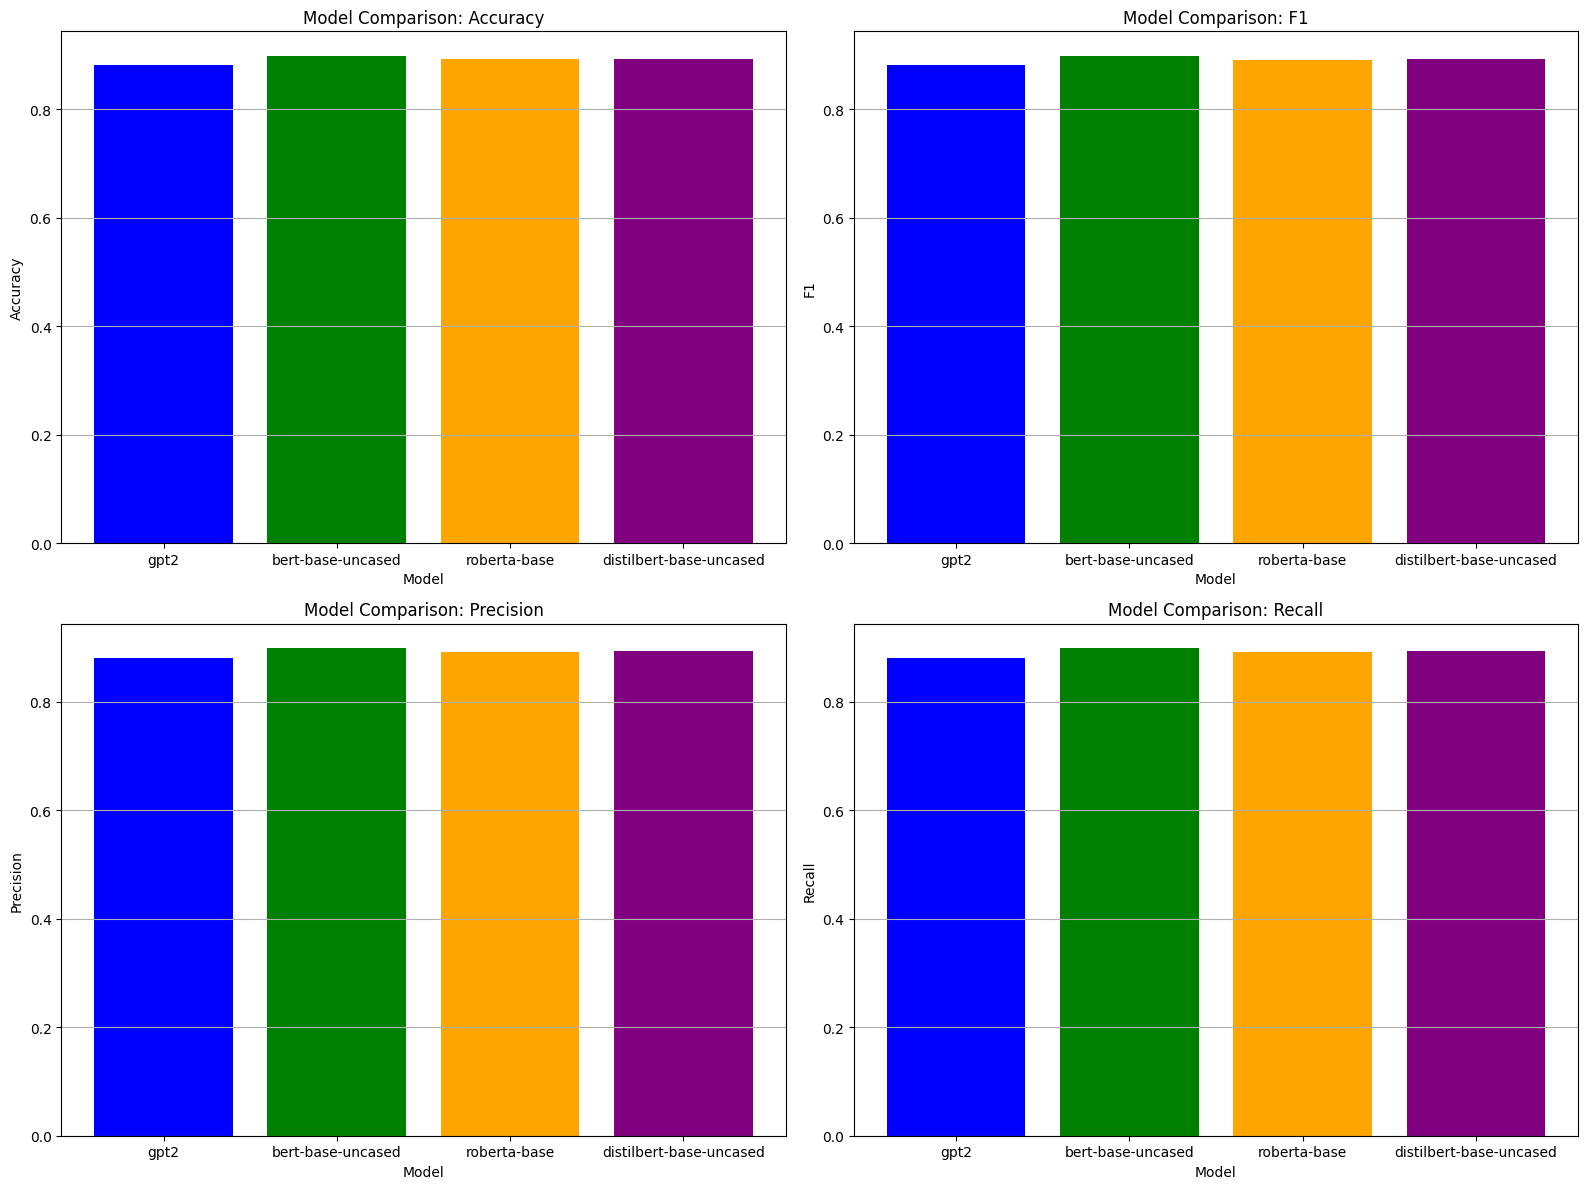


Detailed Results for gpt2:
Accuracy: 0.8812
F1: 0.8808
Precision: 0.8814
Recall: 0.8812

Detailed Results for bert-base-uncased:
Accuracy: 0.8984
F1: 0.8982
Precision: 0.8986
Recall: 0.8984

Detailed Results for roberta-base:
Accuracy: 0.8914
F1: 0.8911
Precision: 0.8915
Recall: 0.8914

Detailed Results for distilbert-base-uncased:
Accuracy: 0.8925
F1: 0.8922
Precision: 0.8926
Recall: 0.8925


In [ ]:
# Step 6: Comparison and Visualization
metrics_to_plot = ["accuracy", "f1", "precision", "recall"]

# Prepare data for visualization
model_names = list(results.keys())
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics_to_plot}

# Plot metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(model_names, metric_values[metric], color=["blue", "green", "orange", "purple"])
    axes[i].set_title(f"Model Comparison: {metric.capitalize()}")
    axes[i].set_xlabel("Model")
    axes[i].set_ylabel(metric.capitalize())
    axes[i].grid(axis="y")

plt.tight_layout()
plt.show()

# Printing detailed results for each model
for model_name, metrics in results.items():
    print(f"\nDetailed Results for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")